*Goal:* Start by recreating something like this:

![riley](https://www.christies.com/img/LotImages/2017/CKS/2017_CKS_13879_0200_000(bridget_riley_june).jpg)

In [1]:
import shades
import random

In [2]:
# just directly lift pallete from the above picture
pallete = [
    (225, 164, 0), # yellow
    (231, 211, 145), # beige
    (63, 151, 202), # light blue
    (71, 106, 175),  # dark blue
    (36, 172, 160), # turqoise
    (235, 189, 191), # light pink
    (223, 73, 104), # dark pink
    (0, 152, 165), # sea green
    (118, 178, 75), # green
    (210, 203, 186), # grey
]

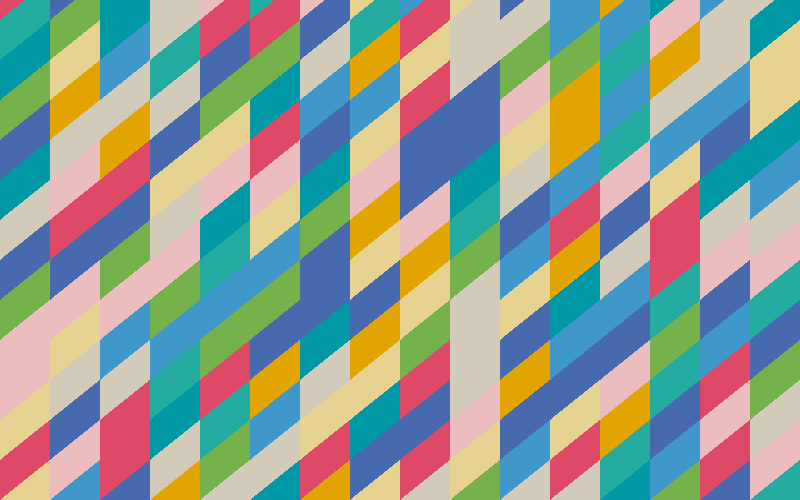

In [3]:
# ok, let's start just by recreating the diagonal grid with random shades
canvas = shades.Canvas(500, 800)
ink = shades.BlockColor()

grid_width = 50
grid_height = 40
grid_offset = 20

for x in range(-grid_width, canvas.width+grid_width, grid_width):
    for y in range(-grid_height, canvas.height+grid_height, grid_height):
        ink.color = random.choice(pallete)
        ink.shape(
            canvas,
            [(x, y + grid_offset),
            (x + grid_width, y - grid_offset),
            (x + grid_width, y + grid_height - grid_offset),
            (x, y + grid_height + grid_offset)],
        )

canvas

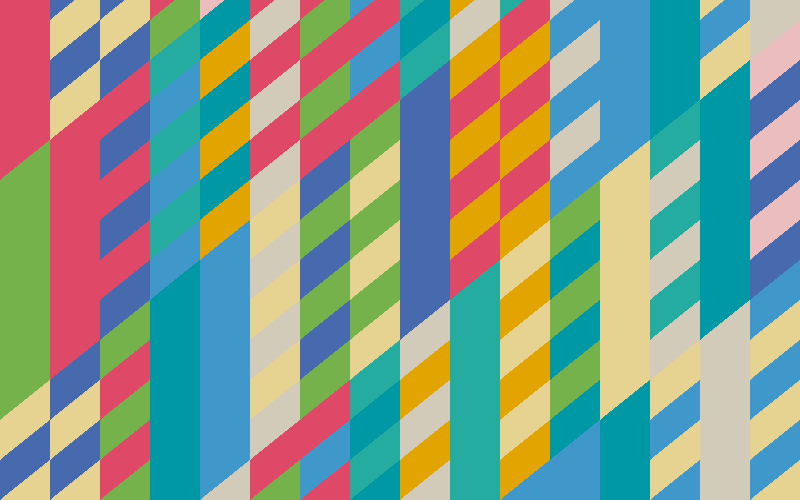

In [4]:
# now, what if we move in blocks of alternating colors?
canvas = shades.Canvas(500, 800)
ink = shades.BlockColor()

grid_width = 50
grid_height = 40
grid_offset = 20

def pick_two_colors():
    # lets make sure we return a single block fairly often
    if random.random() < 0.25:
        color = random.choice(pallete)
        return [color, color]
    return [
        random.choice(pallete),
        random.choice(pallete),
    ]
block_size = 6


for j, x in enumerate(range(-grid_width, canvas.width+grid_width, grid_width)):
    for i, y in enumerate(range(-grid_height, canvas.height+grid_height, grid_height)):
        if (i + j) % block_size == 0:
            two_colors = pick_two_colors()
        ink.color = two_colors[i % 2]
        ink.shape(
            canvas,
            [(x, y + grid_offset),
            (x + grid_width, y - grid_offset),
            (x + grid_width, y + grid_height - grid_offset),
            (x, y + grid_height + grid_offset)],
        )

canvas

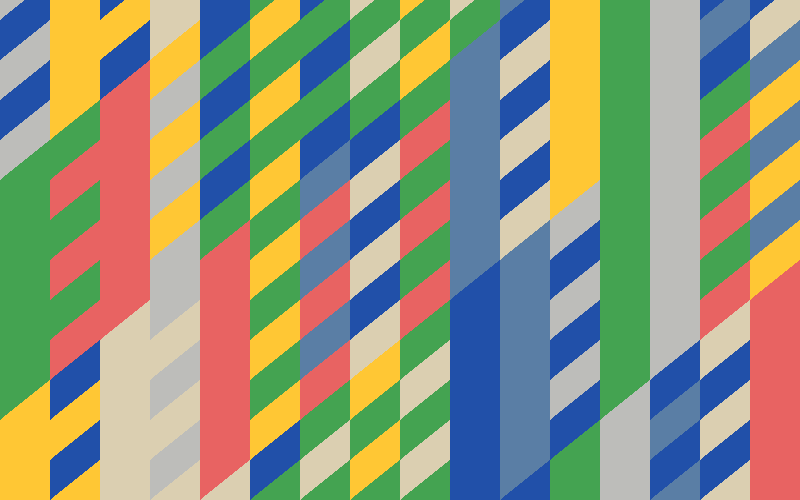

In [5]:
# lets try with our own color pallete?
pallete = [
    (33, 80, 169), # blue
    (90, 126, 165), # light blue
    (68, 163, 81), # green
    (255, 199, 52), # yellow
    (219, 207, 177), # beige
    (189, 189, 186), # grey
    (232, 99, 98), # pink
]

canvas = shades.Canvas(500, 800)
ink = shades.BlockColor()

grid_width = 50
grid_height = 40
grid_offset = 20

def pick_two_colors():
    # lets make sure we return a single block fairly often
    if random.random() < 0.25:
        color = random.choice(pallete)
        return [color, color]
    return [
        random.choice(pallete),
        random.choice(pallete),
    ]
block_size = 6


for j, x in enumerate(range(-grid_width, canvas.width+grid_width, grid_width)):
    for i, y in enumerate(range(-grid_height, canvas.height+grid_height, grid_height)):
        if (i + j) % block_size == 0:
            two_colors = pick_two_colors()
        ink.color = two_colors[i % 2]
        ink.shape(
            canvas,
            [(x, y + grid_offset),
            (x + grid_width, y - grid_offset),
            (x + grid_width, y + grid_height - grid_offset),
            (x, y + grid_height + grid_offset)],
        )

canvas

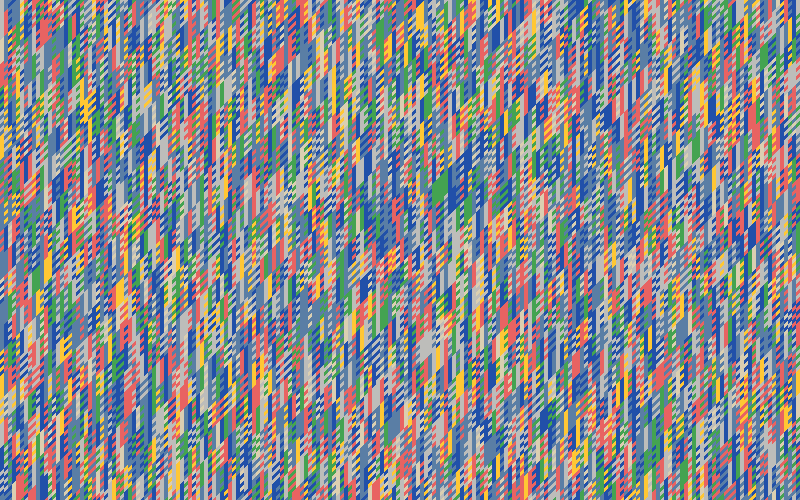

In [17]:
# messing with the variables, and weighting colors
pallete = [
    (33, 80, 169), # blue
    (90, 126, 165), # light blue
    (68, 163, 81), # green
    (255, 199, 52), # yellow
    (219, 207, 177), # beige
    (189, 189, 186), # grey
    (232, 99, 98), # pink
]
pallete_weights = [random.random() for i in range(len(pallete))]

canvas = shades.Canvas(500, 800)
ink = shades.BlockColor()

grid_width = random.randint(1, 100)
grid_height = random.randint(1, 50)
grid_offset = int(grid_height/random.choice([1, 2, 4]))
grid_height = grid_offset * 2 # ensuring exact division
                  
def pick_two_colors():
    # lets make sure we return a single block fairly often
    if random.random() < 0.25:
        color = random.choices(pallete, weights=pallete_weights)[0]
        return [color, color]
    return random.choices(pallete, weights=pallete_weights, k=2)

block_size = 6


for j, x in enumerate(range(-grid_width, canvas.width+grid_width, grid_width)):
    for i, y in enumerate(range(-grid_height-grid_offset, canvas.height+grid_height+grid_offset, grid_height)):
        if (i + j) % block_size == 0:
            two_colors = pick_two_colors()
        ink.color = two_colors[i % 2]
        ink.shape(
            canvas,
            [(x, y + grid_offset),
            (x + grid_width, y - grid_offset),
            (x + grid_width, y + grid_height - grid_offset),
            (x, y + grid_height + grid_offset)],
        )

canvas